# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [44]:
import pandas as pd

df_flights = pd.read_csv('/Users/shuvrajyotidebroy/Downloads/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution will be provided.

#### Data Cleansing

In [ ]:
my_df = df_flights
my_df.interpolate(method ='linear', limit_direction ='forward')

#### Distribution of DepDelay and ArrDelay

array([[<AxesSubplot:title={'center':'DepDelay'}>,
        <AxesSubplot:title={'center':'ArrDelay'}>]], dtype=object)

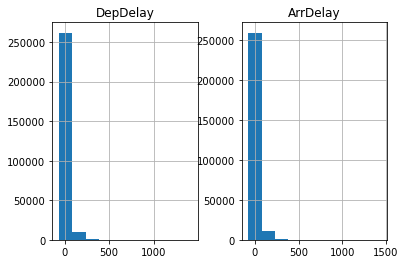

In [93]:
my_df.hist(["DepDelay", "ArrDelay"])

#### Import libraries

In [ ]:
import statistics as st
import matplotlib.pyplot as plt

#### Average departure / arrival delays

In [ ]:
# Average departure delays
avg_depdelay = st.mean(my_df["DepDelay"])
print(f"Average departure delays : {avg_depdelay}")

# Average arrival delays
avg_arrdelay = st.mean(my_df["ArrDelay"])
print(f"Average arrival delays : {avg_arrdelay}")

#### Carrier delay performance

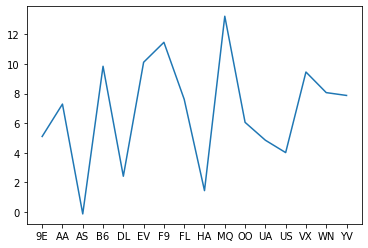

In [43]:
#Carrier comparison in terms of delay performance
plt.plot(my_df.groupby("Carrier")["ArrDelay"].mean())

#### Weekly delay pattern

###### Least 

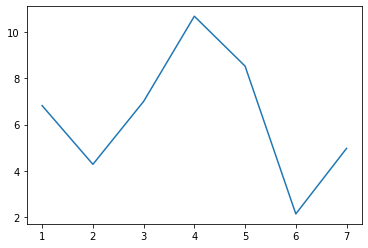

In [47]:
#Week delay pattern
plt.plot(my_df.groupby("DayOfWeek")["ArrDelay"].mean())

#### Highest average delay airport

In [96]:
#Departure airport delay pattern
my_df.groupby("OriginAirportName")["DepDelay"].mean().sort_values(ascending = False)
#Chicago O'Hare International

OriginAirportName
Chicago O'Hare International           16.264636
Chicago Midway International           16.005451
Dallas/Fort Worth International        14.284565
Newark Liberty International           13.954367
John F. Kennedy International          13.847152
                                         ...    
Salt Lake City International            4.967976
Tucson International                    4.651665
Long Beach Airport                      4.316607
Kahului Airport                         2.289428
Ted Stevens Anchorage International     2.213049
Name: DepDelay, Length: 70, dtype: float64

#### OnTime and Delay Departures Vs Arrival Delay

TypeError: list indices must be integers or slices, not Series

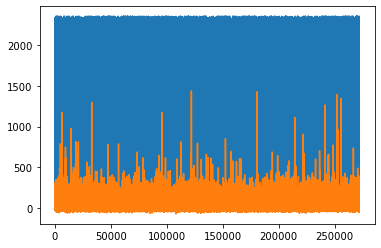

In [80]:
#On time departures Vs Arrival Delay
plt.plot(my_df[['CRSDepTime','ArrDelay']]) [my_df['DepDelay'] == 0]

#Delay departures Vs Arrival Delay
plt.plot(my_df[['CRSDepTime','ArrDelay']]) [my_df['DepDelay'] != 0]

#### Maimum delay route

In [87]:
#Max Route delays
my_df.groupby(["OriginAirportName", "DestAirportName"]).agg({"ArrDelay": ['mean', 'max']})

ArrDelay  \
                                                                                           mean   
OriginAirportName                 DestAirportName                                                 
Albuquerque International Sunport Baltimore/Washington International Thurgood Mar...  -4.789474   
                                  Chicago Midway International                        14.106383   
                                  Chicago O'Hare International                        19.056604   
                                  Dallas Love Field                                    7.328859   
                                  Dallas/Fort Worth International                      7.005747   
...                                                                                         ...   
William P Hobby                   San Antonio International                           11.411111   
                                  San Diego International                              6.844828   
                                  Seattle/Tacoma International                         9.166667   
                                  Tampa International                                  9.256757   
                                  Will Rogers World                                   16.250000   

                                                                                           
                                                                                      max  
OriginAirportName                 DestAirportName                                          
Albuquerque International Sunport Baltimore/Washington International Thurgood Mar...   86  
                                  Chicago Midway International                        112  
                                  Chicago O'Hare International                        193  
                                  Dallas Love Field                                   139  
                                  Dallas/Fort Worth International                     213  
...                                                                                   ...  
William P Hobby                   San Antonio International                           245  
                                  San Diego International                              56  
                                  Seattle/Tacoma International                         25  
                                  Tampa International                                 117  
                                  Will Rogers World                                   183  

[2483 rows x 2 columns]